## Independent Practice

Using your preference of `scikit-learn` or `statsmodels`, try to find the best models with:
* only two predictor variables
* only three variables
* only four variables

Evaluate your models using the squared error. Which has the lowest? How do the errors compare to using all the variables?

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
boston = datasets.load_boston()

boston_list = [i for i in boston]
print boston_list

['data', 'feature_names', 'DESCR', 'target']


In [19]:
print boston.data[0]
print boston.feature_names
print boston.target[0:3]
print boston.DESCR[0:6]

[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[ 24.   21.6  34.7]
Boston


In [20]:
feature_names = [i for i in boston.feature_names]

In [26]:
bdf = pd.DataFrame(boston.data, columns=feature_names)
bdf.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [28]:
target = pd.DataFrame(boston.target, columns=['MEDV'])
target.head(3)

,MEDV
0,24.0
1,21.6
2,34.7


In [33]:
bdf2 = pd.concat([bdf, target], axis=1)

In [34]:
bdf2.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [44]:
tax_model = smf.ols(formula = 'MEDV ~ TAX', data=bdf2).fit()
predictions_tax = tax_model.predict()

X = bdf2['TAX']
X = sm.add_constant(X) 
y = target['MEDV']
mse_tax_model = mean_squared_error(y, predictions_tax)


65.8872753368


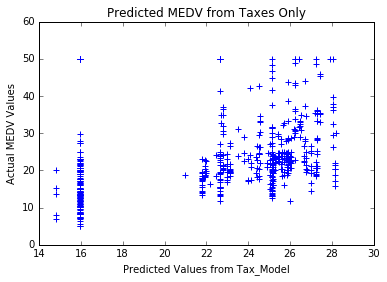

In [47]:
plt.scatter(predictions_tax, y, s =30, c='b', marker='+')
plt.xlabel('Predicted Values from Tax_Model')
plt.ylabel('Actual MEDV Values')
plt.title('Predicted MEDV from Taxes Only')
print mse_tax_model

In [49]:
bdf.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')

64.2269828149


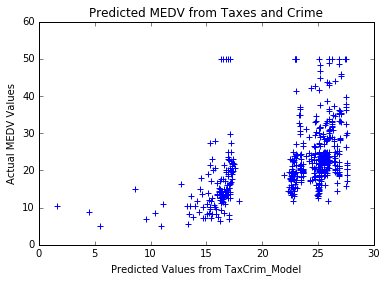

In [50]:
taxcrim_model = smf.ols(formula = 'MEDV ~ TAX + CRIM', data=bdf2).fit()
predictions_taxcrim = taxcrim_model.predict()

X = bdf2[['TAX', 'CRIM']]
X = sm.add_constant(X) 
y = target['MEDV']
mse_taxcrim_model = mean_squared_error(y, predictions_taxcrim)

plt.scatter(predictions_taxcrim, y, s =30, c='b', marker='+')
plt.xlabel('Predicted Values from TaxCrim_Model')
plt.ylabel('Actual MEDV Values')
plt.title('Predicted MEDV from Taxes and Crime')
print mse_taxcrim_model

37.885639166


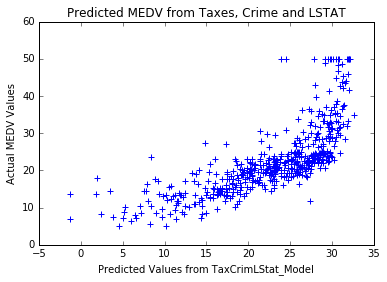

In [51]:
taxcrimlstat_model = smf.ols(formula = 'MEDV ~ TAX + CRIM + LSTAT', data=bdf2).fit()
predictions_taxcrimlstat = taxcrimlstat_model.predict()

X = bdf2[['TAX', 'CRIM', 'LSTAT']]
X = sm.add_constant(X) 
y = target['MEDV']
mse_taxcrimlstat_model = mean_squared_error(y, predictions_taxcrimlstat)

plt.scatter(predictions_taxcrimlstat, y, s =30, c='b', marker='+')
plt.xlabel('Predicted Values from TaxCrimLStat_Model')
plt.ylabel('Actual MEDV Values')
plt.title('Predicted MEDV from Taxes, Crime and LSTAT')
print mse_taxcrimlstat_model

37.6458122871


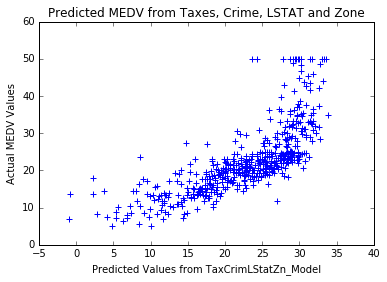

In [53]:
taxcrimlstatzn_model = smf.ols(formula = 'MEDV ~ TAX + CRIM + LSTAT + ZN', data=bdf2).fit()
predictions_taxcrimlstatzn = taxcrimlstatzn_model.predict()

X = bdf2[['TAX', 'CRIM', 'LSTAT', 'ZN']]
X = sm.add_constant(X) 
y = target['MEDV']
mse_taxcrimlstatzn_model = mean_squared_error(y, predictions_taxcrimlstatzn)

plt.scatter(predictions_taxcrimlstatzn, y, s =30, c='b', marker='+')
plt.xlabel('Predicted Values from TaxCrimLStatZn_Model')
plt.ylabel('Actual MEDV Values')
plt.title('Predicted MEDV from Taxes, Crime, LSTAT and Zone')
print mse_taxcrimlstatzn_model

37.6458122871


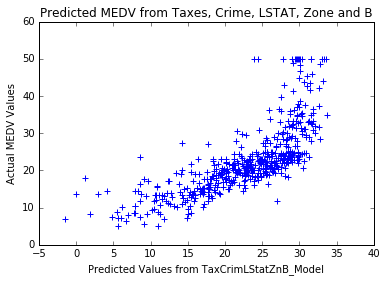

In [58]:
taxcrimlstatznb_model = smf.ols(formula = 'MEDV ~ TAX + CRIM + LSTAT + ZN + B', data=bdf2).fit()
predictions_taxcrimlstatznb = taxcrimlstatznb_model.predict()

X = bdf2[['TAX', 'CRIM', 'LSTAT', 'ZN', 'B']]
X = sm.add_constant(X) 
y = target['MEDV']
mse_taxcrimlstatznb_model = mean_squared_error(y, predictions_taxcrimlstatznb)

plt.scatter(predictions_taxcrimlstatznb, y, s =30, c='b', marker='+')
plt.xlabel('Predicted Values from TaxCrimLStatZnB_Model')
plt.ylabel('Actual MEDV Values')
plt.title('Predicted MEDV from Taxes, Crime, LSTAT, Zone and B')
print mse_taxcrimlstatzn_model

In [52]:
bdf.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')

In [72]:
blah = []
for i in bdf.columns:
    blah.append(i)
def join_blah(blah):
    for i in blah:
        return " + ".join(blah)

In [78]:
x = join_blah(blah)
x

'CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

21.8977792177


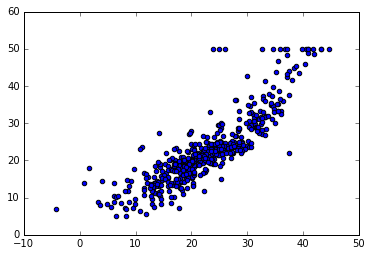

In [83]:
bdf_model = smf.ols(formula = 'MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE +  \
DIS + RAD + TAX + PTRATIO + B + LSTAT', data = bdf2).fit() 
predictions_bdf = bdf_model.predict()
y = target['MEDV']

plt.scatter(predictions_bdf, y)
bdf_mse = mean_squared_error(y, predictions_bdf)
print bdf_mse

In [ ]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
# Plot the models side-by-side
plt.scatter(predictions, y, s=30, c='r', marker='+')
plt.xlabel("Predicted Values from RM, Model 1")
plt.ylabel("Actual Values MEDV")

ax2 = fig.add_subplot(122)
plt.scatter(predictions2, y, s=30, c='r', marker='+')
plt.xlabel("Predicted Values from RM, Model 2")
plt.ylabel("Actual Values MEDV")


plt.show()
print "Model 1 MSE:", mean_squared_error(y, predictions)
print "Model 2 MSE:", mean_squared_error(y, predictions2)